<font color='orange'><h1>Task 6 : Prediction using Decision Tree Algorithm</h1></font>
(Level - Intermediate)


### Name : Bhavinkumar Patel
### gripapril21

● Create the Decision Tree classifier and visualize it graphically.

● The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

● Dataset : https://bit.ly/3kXTdox

● YouTube : https://youtu.be/ZskPrZpME4U

● GitHub : https://github.com/bhavinpatel-DS/gripapril21-Task6.git

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
iris = pd.read_csv(r"Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.shape

(150, 6)

In [4]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
iris['Species'] = le.fit_transform(iris['Species'])

In [9]:
iris['Species'].unique()

array([0, 1, 2])

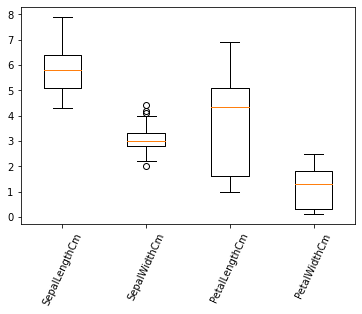

In [10]:
# Lets check the outliers if there in dataset.

#iris.columns
SLCm = iris['SepalLengthCm']
SWCm = iris['SepalWidthCm']
PLCm = iris['PetalLengthCm']
PWCm = iris['PetalWidthCm']

columns = [SLCm, SWCm, PLCm, PWCm]

fig, ax = plt.subplots()
ax.boxplot(columns)
plt.xticks([1,2,3,4],['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'], rotation = 65)
plt.show()

We can see that "SepalWidthCm" column has an outliers in to it. We have to treat the Outliers now.

In [11]:
# Lets calculate the Upper Range and Lower Range from IQR

Q1 = iris['SepalWidthCm'].quantile(0.25)
Q3 = iris['SepalWidthCm'].quantile(0.75)

IQR = Q3 - Q1
print("The Inter Quartile Rage is : ",IQR)

UR = Q3+1.5*IQR
LR = Q1-1.5*IQR

The Inter Quartile Rage is :  0.5


In [12]:
# Now lets do the treatment of Outliers removal from "SepalWidthCm"

sepal = iris.index[iris['SepalWidthCm']>UR]
sepal.append(iris.index[iris['SepalWidthCm']<LR])

iris = iris.drop(sepal)
iris.reset_index(drop=True)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
142,146,6.7,3.0,5.2,2.3,2
143,147,6.3,2.5,5.0,1.9,2
144,148,6.5,3.0,5.2,2.0,2
145,149,6.2,3.4,5.4,2.3,2


In [13]:
X = iris.iloc[:,1:5].values
y = iris.iloc[:,5].values

In [14]:
print("Shape of X Features is : ",X.shape)
print("Shape of y target is :",y.shape)

Shape of X Features is :  (147, 4)
Shape of y target is : (147,)


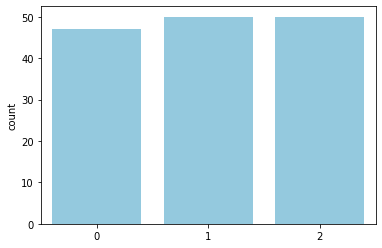

In [15]:
sns.countplot(y, color='skyblue')
plt.show()

In [16]:
# Lets split the data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
print("Shape of X_train : ",X_train.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of X_test : ",X_test.shape)
print("Shape of y_test : ",y_test.shape)

Shape of X_train :  (117, 4)
Shape of y_train :  (117,)
Shape of X_test :  (30, 4)
Shape of y_test :  (30,)


In [18]:
# Lets build the Decision Tree Classifier Model

In [19]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
y_pred = DTC.predict(X_test)
y_pred

array([2, 1, 2, 0, 2, 0, 1, 0, 1, 0, 0, 1, 2, 2, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0])

In [21]:
# Lets check the accuracy of the built model.

In [23]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, precision_score,recall_score,f1_score
acc = accuracy_score(y_test,y_pred)*100
acc
print(f"Our Built model is {acc}% Accurate.")

Our Built model is 96.66666666666667% Accurate.


In [24]:
# Lets compare the Actual Values with Predicted Values

compare = {'Actual Values':y_test, 'Predicted Values':y_pred}
print(compare)

{'Actual Values': array([2, 1, 2, 0, 2, 0, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0]), 'Predicted Values': array([2, 1, 2, 0, 2, 0, 1, 0, 1, 0, 0, 1, 2, 2, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0])}


In [25]:
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test,y_pred)

print("R2 Score is : ",r2)
print("Mean Square Error is : ",mse)
print("Root Mean Square Error is : ",rmse)
print("Mean Absolute Error is : ", mae)

R2 Score is :  0.9496644295302014
Mean Square Error is :  0.03333333333333333
Root Mean Square Error is :  0.18257418583505536
Mean Absolute Error is :  0.03333333333333333


In [26]:
# Lets calculate the Precission Recall and F1 Scores

precission = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [27]:
print("Precision : ",precission)
print("Recall : ",recall)
print("F1 Score : ",f1)

Precision :  0.9666666666666667
Recall :  0.9666666666666667
F1 Score :  0.9649122807017544


In [28]:
# Lets visualize the Tree

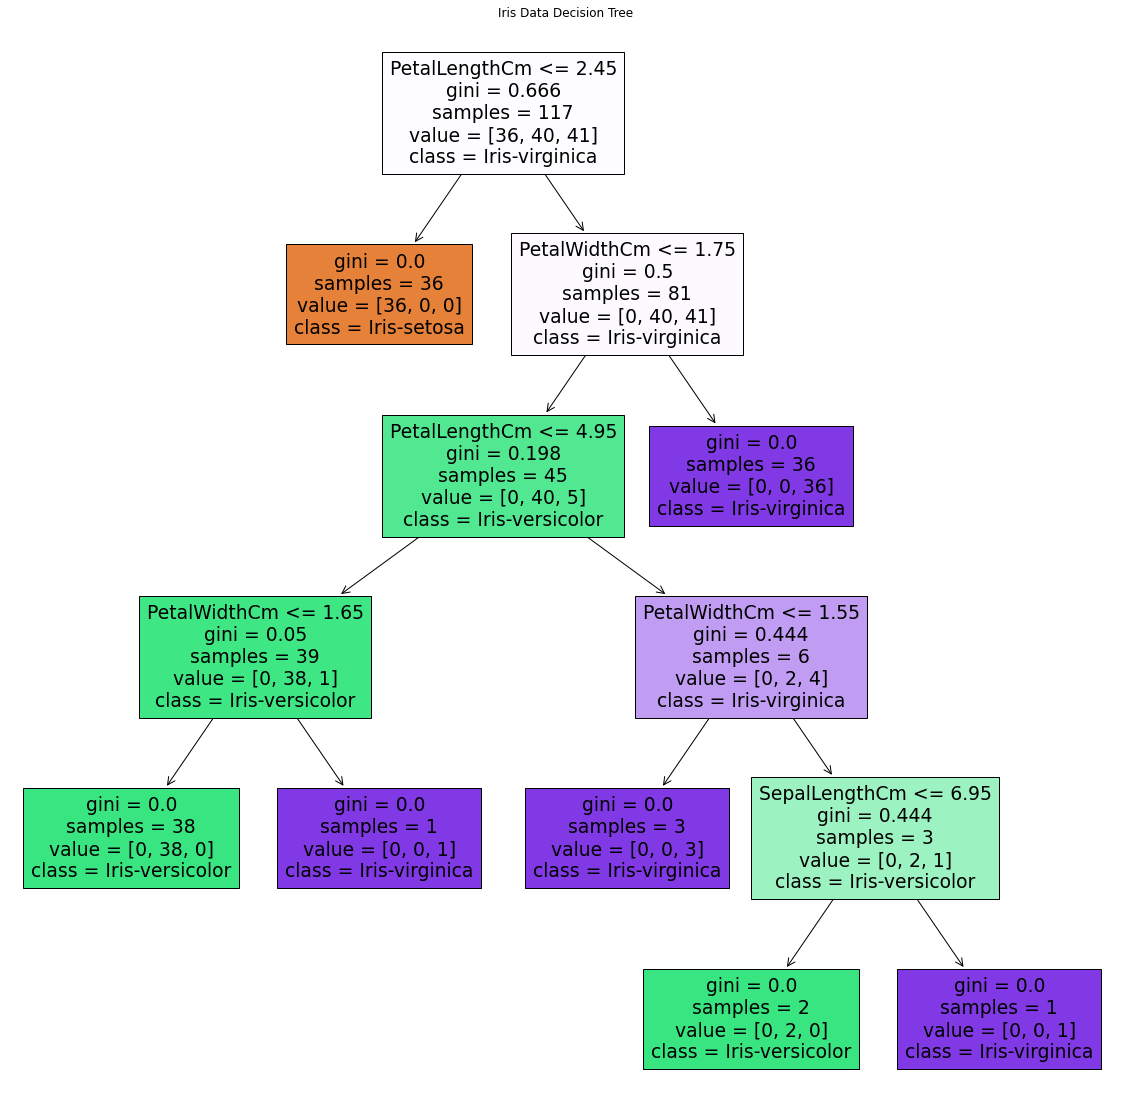

In [29]:
from sklearn import tree

plt.figure(figsize=(20,20))
cls = ['Iris-setosa','Iris-versicolor','Iris-virginica']
tree.plot_tree(DTC,feature_names=iris.iloc[:,1:5].columns.values, class_names=cls,filled=True)
plt.title("Iris Data Decision Tree")
plt.show()

In [30]:
iris.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0


In [31]:
iris.tail(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


In [33]:
# Lets predict the data as per user input from the built model.
# With comparing the above data and its outcome.

SL = float(input("Enter the SepalLength in Cms : "))
SW = float(input("Enter the SepalWidth in Cms : "))
PL = float(input("Enter the PetalLength in Cms : "))
PW = float(input("Enter the PetalWidth in Cms : "))

DTC.predict([[SL,SW,PL,PW]])

Enter the SepalLength in Cms : 6.2
Enter the SepalWidth in Cms : 3.4
Enter the PetalLength in Cms : 5.4
Enter the PetalWidth in Cms : 2.3


array([2])

#### As per the above data and the input, Decision Tree Model has been built and Visualized with the Accuracy about 96.66% in the iris dataset.

We have also predict the class of the inserted data from user input and got 2 which maps to "Iris-virginica"

# Thank you.

## Bhavinkumar Patel